In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


In [2]:
import os

# Move kaggle.json to ~/.kaggle folder
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set proper permissions
!chmod 600 ~/.kaggle/kaggle.json

# Download the Intel Image Classification dataset
!kaggle datasets download -d puneet6060/intel-image-classification

# Unzip the dataset
!unzip intel-image-classification.zip -d /content/intel_dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7506.jpg  
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7537.jpg  
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7539.jpg  
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7551.jpg  
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7560.jpg  
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7565.jpg  
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7578.jpg  
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7581.jpg  
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7586.jpg  
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7647.jpg  
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7652.jpg  
  inflating: /content/intel_dataset/seg_train/seg_train/mountain/7654.jpg  
  inflating: /content/intel_dataset/s

In [29]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import random

In [11]:
# Define dataset path (update this based on your actual dataset location)
DATASET_PATH = "/content/intel_dataset/seg_train"

# Define transformations
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Random crop & resize
    transforms.RandomHorizontalFlip(),  # Flip images horizontally
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [12]:
# Load dataset using ImageFolder
full_dataset = datasets.ImageFolder(root=DATASET_PATH, transform=train_transforms)

# Split dataset: 70% train, 15% val, 15% test
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])


In [35]:
# Apply test transforms to val and test sets
val_dataset.dataset.transform = test_transforms
test_dataset.dataset.transform = test_transforms

# Create DataLoaders
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Get a random batch from the DataLoader
data_iter = iter(train_loader)  # Get iterator from DataLoader
images, labels = next(data_iter)  # Fetch one batch

# Select a subset (e.g., 4 images)
num_samples = 4  # Adjust for more/less samples
random_indices = random.sample(range(len(train_dataset)), num_samples)  # Random indices


# indices = torch.randint(0, len(images), (num_samples,))  # Get random indices
# sample_images = images[indices]
# sample_labels = labels[indices]

# Define function to unnormalize and display images
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # Convert tensor to NumPy image
    mean = np.array([0.485, 0.456, 0.406])  # Mean used in normalization
    std = np.array([0.229, 0.224, 0.225])   # Std used in normalization
    img = img * std + mean  # Unnormalize
    img = np.clip(img, 0, 1)  # Ensure values are valid for display
    return img


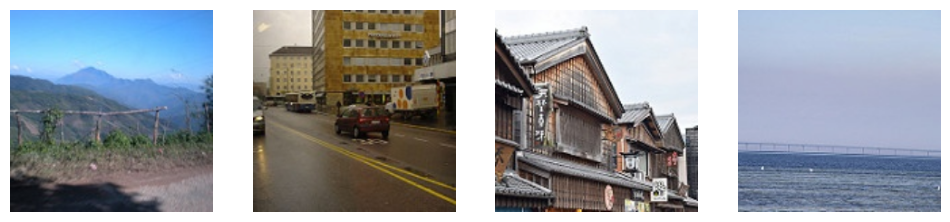

In [37]:

# Plot images
fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))
for i, ax in enumerate(axes):
    img, label = train_dataset[random_indices[i]]  # Fetch random image-label pair
    ax.imshow(imshow(img))
    ax.axis("off")

plt.show()